<a href="https://colab.research.google.com/github/alerodriguessf/kmeans-clustering-clients-commerce/blob/main/Portfolio_Clustering_Model_Kmeans_20250122.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Portfolio_Clustering Model_Kmeans_20250122

In [ ]:
#Dependency Installation

!pip install sidetable yellowbrick
!pip install ydata-profiling
!pip install --upgrade matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 54.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=45a5024503b4a63b5bb65a272f3b479ab8c9d4844795461b999958dfcb12869b
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.

In [ ]:
#Importing libraries

import pandas as pd
import numpy as np
import sidetable

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.mixture import GaussianMixture
from ydata_profiling import ProfileReport

from yellowbrick.cluster import KElbowVisualizer


In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()



Saving data.csv to data.csv


## **Step 01) Exploratory Data Analysis**

1. Load the dataset;
2. Perform a statistical description of the data;
3. Visualize distributions and identify the relevance of columns for analysis;
4. Check for missing data, duplicates, outliers, and other inconsistencies

## 1.1 Loading the dataset;


In [ ]:
# Load the DataFrame

df = pd.read_csv('data.csv', encoding='latin1')

## 1.2 Performing a statistical description of the data;


In [ ]:
# Generating a statistical description of the data;
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Generates an initial report to explore the data
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# Assess if all variables are of the correct type to apply possible changes during the preprocessing stage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.describe

<bound method NDFrame.describe of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/2010 8:26       2.55     17850.0  United Kingdom  
1        12/1/2010 8:26       3.39     17850.0  United Kingdom  
2        12/1/2010 8:26       2.75     17850.0  United Kingdom  
3        12/1/2010 8:26       3.39     17850.0  United Kingdom  
4        12/1/2010 8:26       3.39     17850.0  United Kingdom  
...                 ...        ...         ...             ...  
541904  12/9/2011 12:50       0.85     12680.0          France  
541905  12/9/2011 12:50       2.10     12680.0          France  
541906  12/9/2011 12:50       4.15     12680.0          France  
541907  12/9/2011 12:50       4.15     12680.0          France  
541908  12/9/2011 12:50       4.95     12680.0          France  

[541909 rows x 8 columns]>

## 1.3 Visualizing distributions and identifying the relevance of columns for analysis;

In [ ]:
#Identifying the number of unique values in two variables

df[['Description', 'Country']].nunique()

,0
Description,4223
Country,38


In [ ]:
# Identifying outliers, negative values, and other inconsistencies in the data

df[['Quantity','UnitPrice']].describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


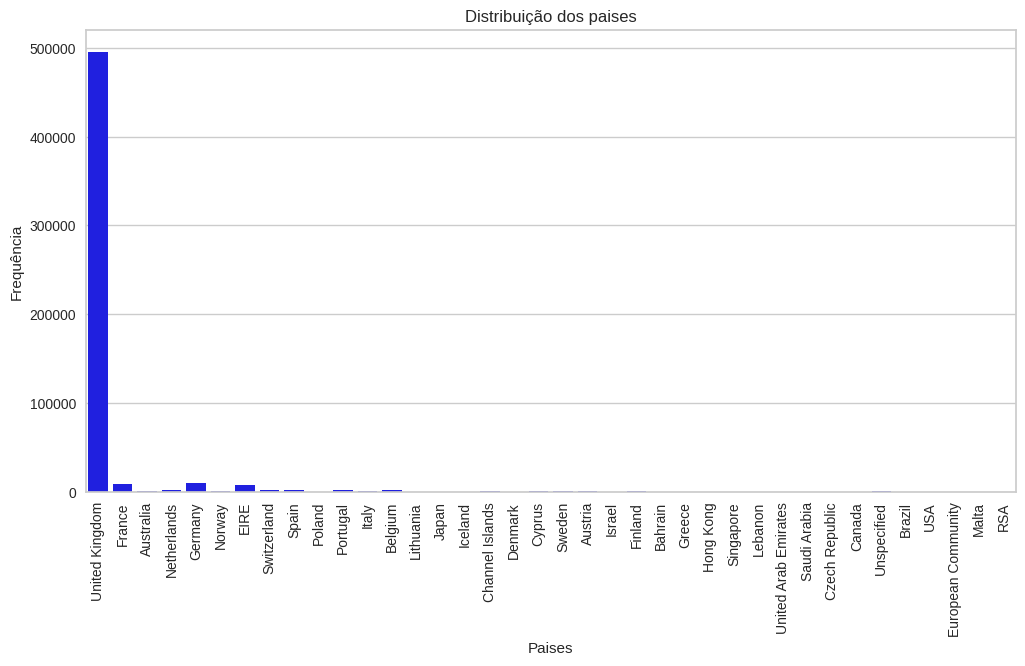

In [ ]:
# Visualizing the distribution frequency by country to evaluate whether the country column makes sense to keep

plt.figure(figsize=(12, 6))
sns.countplot(x=df['Country'], color='blue')
plt.title('Distribuição dos paises')
plt.xlabel('Paises')
plt.ylabel('Frequência')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# A simpler representation of country frequency
df.stb.freq(['Country'])

,Country,count,percent,cumulative_count,cumulative_percent
0,United Kingdom,495478,91.431956,495478,91.431956
1,Germany,9495,1.752139,504973,93.184095
2,France,8557,1.579047,513530,94.763143
3,EIRE,8196,1.512431,521726,96.275574
4,Spain,2533,0.467422,524259,96.742996
5,Netherlands,2371,0.437527,526630,97.180523
6,Belgium,2069,0.381798,528699,97.562321
7,Switzerland,2002,0.369435,530701,97.931756
8,Portugal,1519,0.280305,532220,98.212061
9,Australia,1259,0.232327,533479,98.444388


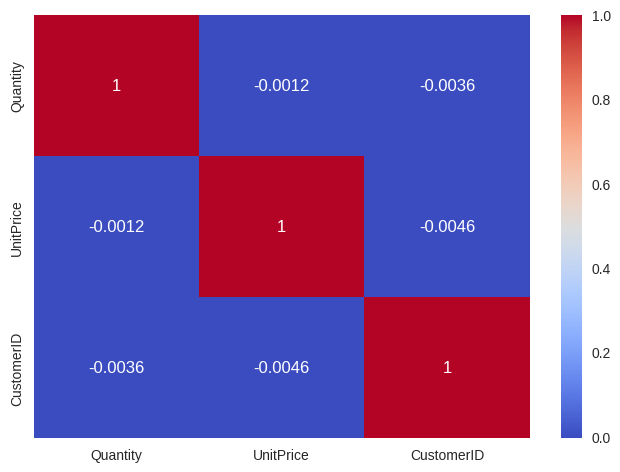

In [ ]:
# Evaluate the correlation between numerical variables
corr = df.select_dtypes(include=np.number).corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

##1.4 Checking for missing data, duplicates, outliers, and other inconsistencies

### Although there is already a clear idea of the outliers based on the complete report from step 1

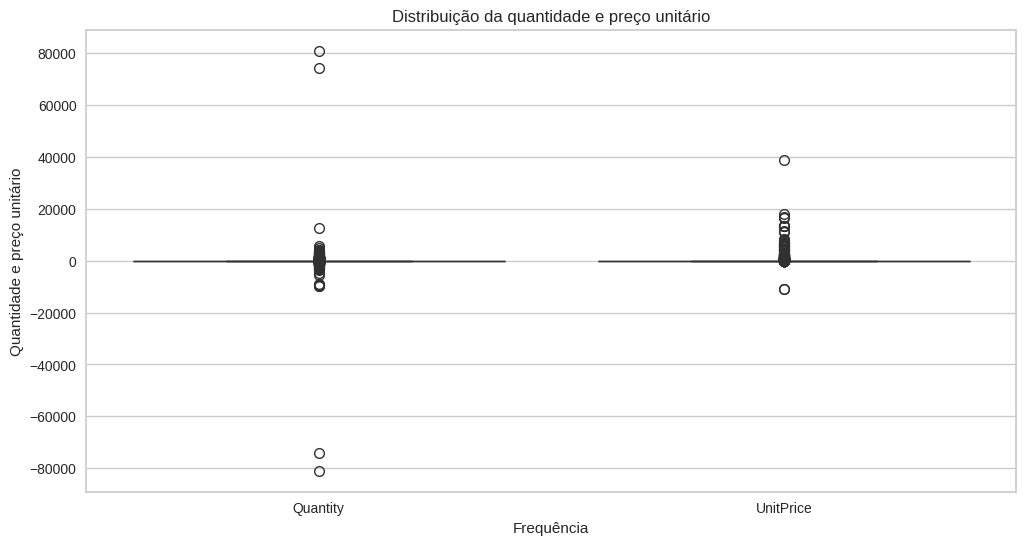

In [ ]:
# Plotted a boxplot to identify outliers in numerical variables
plt.figure(figsize=(12, 6))
sns.boxplot(df[['Quantity', 'UnitPrice']])
plt.title('Distribuição da quantidade e preço unitário')
plt.ylabel('Quantidade e preço unitário')
plt.xlabel('Frequência')
plt.show()


In [ ]:
# Sum of null rows in each column
df.isnull().sum().sort_values(ascending=False)

,0
CustomerID,135080
Description,1454
InvoiceNo,0
StockCode,0
Quantity,0
InvoiceDate,0
UnitPrice,0
Country,0


In [ ]:
# Checking for missing values
df.stb.missing()

,missing,total,percent
CustomerID,135080,541909,24.926694
Description,1454,541909,0.268311
InvoiceNo,0,541909,0.000000
StockCode,0,541909,0.000000
Quantity,0,541909,0.000000
InvoiceDate,0,541909,0.000000
UnitPrice,0,541909,0.000000
Country,0,541909,0.000000


In [ ]:
# Identifying duplicate rows

df.duplicated().sum()

5268

## Step 02) Data Preprocessing

## 2.1 Remove empty rows

In [ ]:
# Remove all empty rows in the CustomerID field
df=df.dropna(subset=['CustomerID'])

In [ ]:
# Confirm the rows were removed
df.stb.missing()

,missing,total,percent
InvoiceNo,0,406829,0.0
StockCode,0,406829,0.0
Description,0,406829,0.0
Quantity,0,406829,0.0
InvoiceDate,0,406829,0.0
UnitPrice,0,406829,0.0
CustomerID,0,406829,0.0
Country,0,406829,0.0


## 2.2 Adjust column types to be compatible with their respective contents

In [ ]:
# Convert columns to data types compatible with their contents

df['CustomerID'] = df['CustomerID'].astype(int)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce', format = '%m/%d/%Y %H:%M')
df['Country'] = df['Country'].astype('category')

<ipython-input-20-f6f6a289cd67>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerID'] = df['CustomerID'].astype(int)
<ipython-input-20-f6f6a289cd67>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce', format = '%m/%d/%Y %H:%M')
<ipython-input-20-f6f6a289cd67>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [ ]:
df = df.copy()

In [ ]:
# Confirming that the types of each variable are correct
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int64         
 7   Country      406829 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 25.2+ MB


## 2.3 Removing outliers and inconsistent values



In [ ]:
# Removing negative values in columns
below = df[['Quantity','UnitPrice']].le(0).any(axis=1)
df = df[~below].copy()

<Axes: >

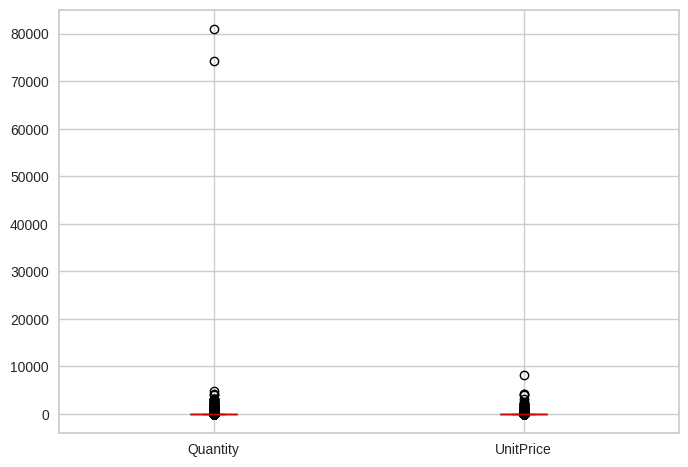

In [ ]:
# Confirming that negative values were excluded
df[['Quantity','UnitPrice']].plot.box()

In [ ]:
# Removing extreme outliers with reasonable limits
df = df.query('Quantity <10_000 & UnitPrice <8_000')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397881 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397881 non-null  object        
 1   StockCode    397881 non-null  object        
 2   Description  397881 non-null  object        
 3   Quantity     397881 non-null  int64         
 4   InvoiceDate  397881 non-null  datetime64[ns]
 5   UnitPrice    397881 non-null  float64       
 6   CustomerID   397881 non-null  int64         
 7   Country      397881 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 24.7+ MB


## 2.4 Calculating the RFM (Recency, Frequency and monetary)


In [ ]:
# Creating a new column for the total purchase value
df['price_total'] = df.Quantity * df.UnitPrice

<ipython-input-27-020b69ea326a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_total'] = df.Quantity * df.UnitPrice


In [ ]:
# Calculating the RFM
df_rfm = (
    df.groupby('CustomerID')
    .agg(
        recency=('InvoiceDate', lambda x: (pd.Timestamp('2012-01-01') - x.max()).days),
        frequency=('InvoiceNo', 'nunique'),
        monetary=('price_total', 'mean')
    )
)

df_rfm.head()

,recency,frequency,monetary
CustomerID,,,
12347,24,7,23.681319
12348,97,4,57.975484
12349,40,1,24.076027
12350,332,1,19.670588
12352,58,8,29.482824


<Axes: >

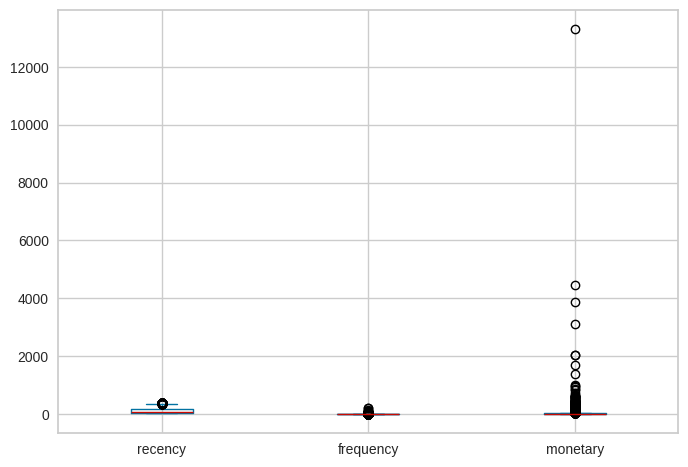

In [ ]:
# Assessing the distribution of the newly created columns
df_rfm.plot.box()

## 2.5 With the DataFrame adjusted for RFM values, I will standardize the data and repeat the process of removing outliers and inconsistent values


In [ ]:
from sklearn.preprocessing import scale

<Axes: >

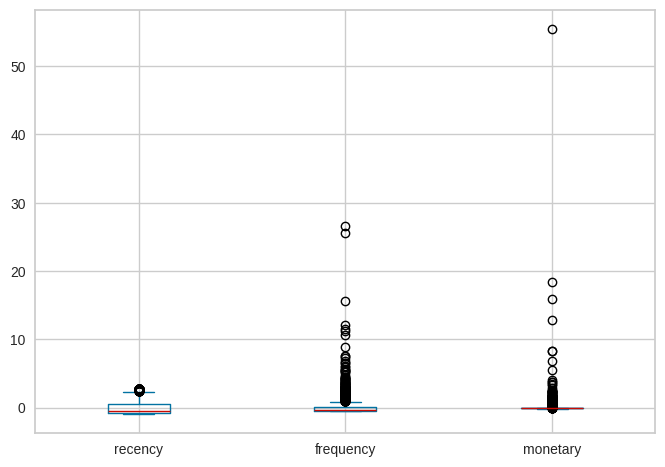

In [ ]:
# Standardize the data
df_rfm.apply(scale).plot.box()

In [ ]:
# Identifying outliers
df_rfm.apply(scale).query('monetary > 50')

,recency,frequency,monetary
CustomerID,,,
15098,0.899878,-0.165317,55.434876


In [ ]:
# Check inconsistencies in this outlier
df.query('CustomerID == 15098')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,price_total
222670,556442,22502,PICNIC BASKET WICKER SMALL,60,2011-06-10 15:22:00,4.95,15098,United Kingdom,297.0
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098,United Kingdom,38970.0
222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,2011-06-10 15:33:00,649.50,15098,United Kingdom,649.5


In [ ]:
# Remove the outlier
df_rfm = df_rfm.drop(15098)

In [ ]:
# Although the data will be normalized, it is already possible to identify outliers in the DataFrame
df_rfm.describe()

,recency,frequency,monetary
count,4336.000000,4336.000000,4336.000000
mean,114.032288,4.272601,34.554185
std,99.968352,7.697927,129.202663
min,22.000000,1.000000,1.450000
25%,39.000000,1.000000,12.339095
50%,72.000000,2.000000,17.715999
75%,163.250000,5.000000,24.843993
max,395.000000,209.000000,4453.430000


<Axes: >

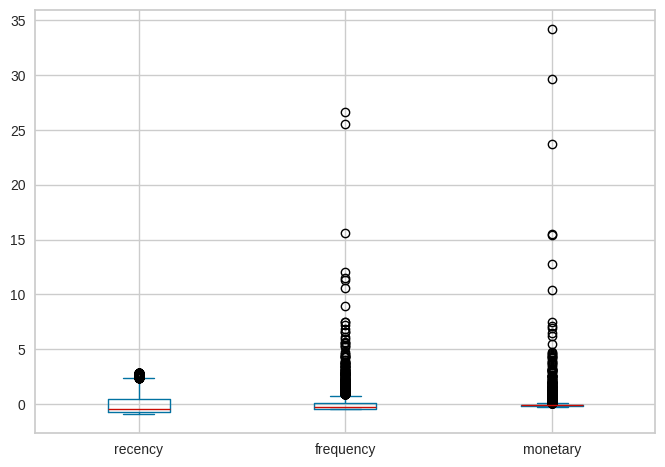

In [ ]:
# Plotted a graph to visually represent outliers
df_rfm.apply(scale).plot.box()

In [ ]:
# Removing outliers by replacing values above the 95th percentile with the 95th percentile value
df_rfm_clip = df_rfm.apply(lambda x: x.clip(upper = x.quantile(0.95)))

In [ ]:
# Confirming that outliers were removed
df_rfm_clip.describe()

,recency,frequency,monetary
count,4336.000000,4336.000000,4336.000000
mean,112.248155,3.608164,23.634656
std,95.504576,3.358999,20.993635
min,22.000000,1.000000,1.450000
25%,39.000000,1.000000,12.339095
50%,72.000000,2.000000,17.715999
75%,163.250000,5.000000,24.843993
max,333.000000,13.000000,91.768421


In [ ]:
scaler = PowerTransformer()

In [ ]:
# Removing outliers using PowerTransformer
df_rfm_scaled = pd.DataFrame(scaler.fit_transform(df_rfm), index=df_rfm.index, columns=df_rfm.columns)

In [ ]:
# Normalizing cleaned data
df_rfm_scaled.head()

,recency,frequency,monetary
CustomerID,,,
12347,-1.563219,1.201866,0.407836
12348,0.323470,0.660670,1.329304
12349,-0.809134,-1.158070,0.426829
12350,1.568467,-1.158070,0.189376
12352,-0.307718,1.309671,0.653411


<Axes: >

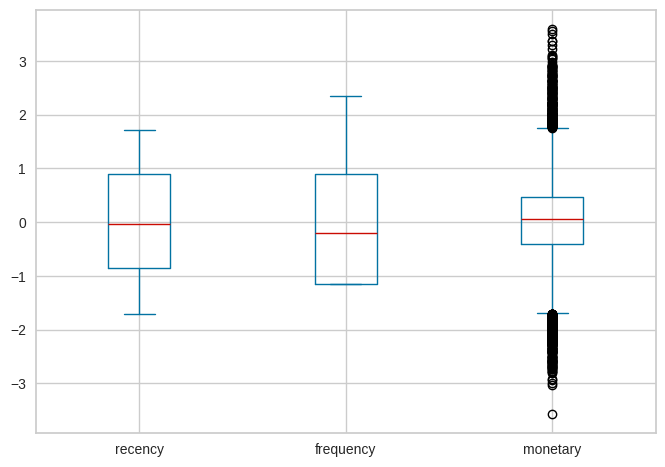

In [ ]:
# Visually representing normalized data
df_rfm_scaled.plot.box()

In [ ]:
# Creating a DataFrame with scaled and outlier-free data for clustering
df_rfm_clip_scaled = df_rfm_clip.apply(scale)

## Step 03) Select a clustering algorithm

1. Choose a suitable algorithm for the dataset, such as KMeans, DBSCAN, Hierarchical, or Mean Shift
2. Find the optimal number of clusters using the Elbow or Silhouette Score methods
3. Implement the chosen algorithm


## 3.1 Choosing KMeans to determine the optimal number of clusters

#### **I chose to use K-Means to define the number of clusters** because it is a simple, efficient method well-suited to this type of analysis and the dataset used in the challenge. K-Means works well for identifying approximately spherical and convex clusters, as seen in the context of RFM analysis (Recency, Frequency, and Monetary), where groups tend to follow this characteristic. K-Means is flexible, handles outliers well, and is easily interpretable.


In [ ]:
from yellowbrick.cluster import KElbowVisualizer

## 3.2 Finding the optimal number of clusters using the Elbow and Silhouette Score methods

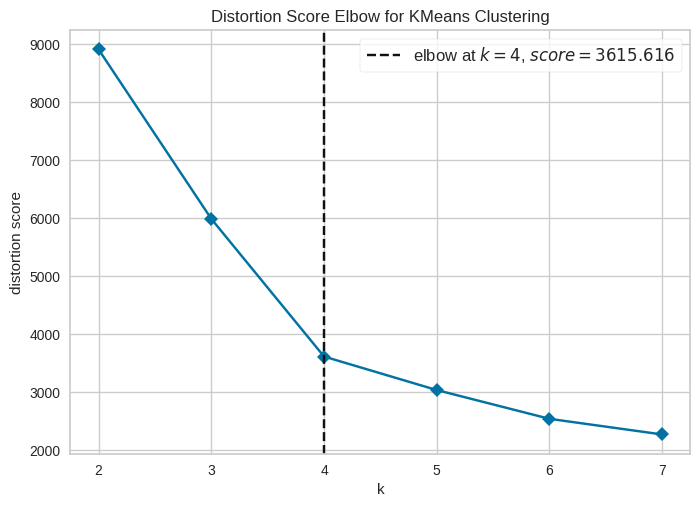

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
## Identifying the ideal number of clusters using the Elbow method

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,8), timings=False)
visualizer.fit(df_rfm_clip_scaled)
visualizer.show()

In [ ]:
# Evaluating the optimal number of clusters based on key clustering quality indicators
cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []
x = df_rfm_clip_scaled.copy()

for k in range(2, min(x.shape[0], 11)):
    model = KMeans(n_clusters=k, random_state=0)
    labels = model.fit_predict(x)
    cluster_results_dict = {'k': k}
    cluster_results_dict['inertia'] = model.inertia_
    for metric in cluster_metrics:
        cluster_results_dict[metric.__name__] = metric(x, labels)
    cluster_metrics_results.append(cluster_results_dict)

cluster_metrics_results

pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,9608.319042,0.481575,1.042550,1533.485432
3,6380.827963,0.395222,0.918987,2250.147145
4,3615.611638,0.479553,0.704462,3751.144746
5,3104.989759,0.386168,0.855067,3453.313624
6,2542.521220,0.397775,0.851237,3564.616053
7,2240.392476,0.401925,0.849436,3467.623360
8,1907.087195,0.383633,0.862005,3598.989252
9,1668.788329,0.394132,0.800834,3675.183274
10,1516.652722,0.351693,0.887890,3641.928356


## After analyzing the metrics, everything seems to indicate that **4 clusters offer the best balance between cohesion and separation of groups**

###**Inertia**: The significant reduction in inertia stabilizes after k=4, meaning more clusters add little improvement.

###**Silhouette Score**: The maximum value at k=4 (0.479) shows good cohesion and separation between clusters.

###**Davies-Bouldin Score**: The lowest value occurs at k=4 (0.704), suggesting an optimal separation.

###**Calinski-Harabasz Index**: The highest value at k=4 (3751) highlights greater distinction between clusters.

## 3.3 Implementing the chosen algorithm


## 3.3 Implementing the chosen algorithm


In [ ]:
# Training the model with the optimal number of clusters
kmeans = KMeans(4)
kmeans_labels = kmeans.fit_predict(df_rfm_clip_scaled)

In [ ]:
# 3D visual representation of the clusters
px.scatter_3d(df_rfm_clip, x='recency', y='frequency', z='monetary', color=kmeans_labels, template='plotly_dark')

## Step 04) Analyze the clusters obtained from KMeans

1. Identify patterns and common characteristics among customers
2. Plot graphs to assist in the analysis

## 4.1 Identifying patterns and common characteristics among customers

In [ ]:
#Presenting the profiles of each cluster based on the RFM metric

df_rfm_clip['cluster'] = kmeans.labels_

cluster_profiles = df_rfm_clip.groupby('cluster').mean()
print("Perfis dos Clusters:\n", cluster_profiles)

Perfis dos Clusters:
             recency  frequency   monetary
cluster                                  
0         67.562181   2.703152  17.120454
1        121.057935   3.876574  80.714098
2        261.186858   1.510267  18.104829
3         41.517018  10.191248  20.426973


In [ ]:
#Creating a DataFrame with normalized cluster data
centers = pd.DataFrame(kmeans.cluster_centers_, columns=df_rfm_clip_scaled.columns)
centers

,recency,frequency,monetary
0,-0.467008,-0.269258,-0.310731
1,0.092255,0.079917,2.719206
2,1.561573,-0.625851,-0.262370
3,-0.740690,1.960061,-0.152811


In [ ]:
cluster_profiles_z = (cluster_profiles - cluster_profiles.mean()) / cluster_profiles.std()
print("Z-Scores dos Clusters:\n", cluster_profiles_z)


Z-Scores dos Clusters:
           recency  frequency  monetary
cluster                               
0       -0.563967  -0.482493 -0.545475
1       -0.018092  -0.179269  1.498510
2        1.411792  -0.790747 -0.513836
3       -0.829733   1.452509 -0.439199


## 4.2 Plotting graphs to assist in the analysis

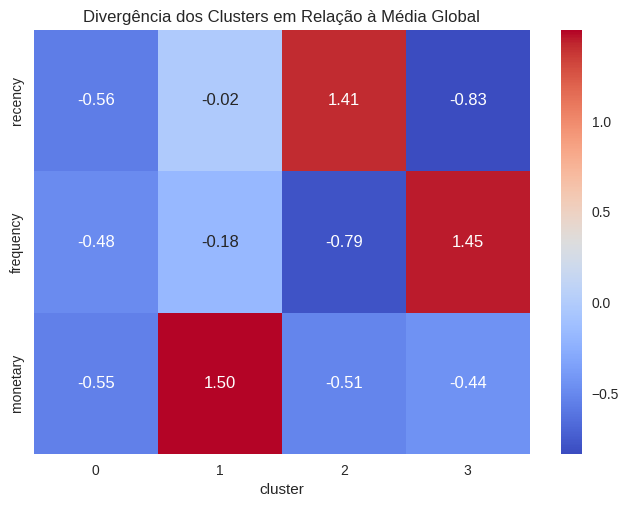

In [ ]:
sns.heatmap(cluster_profiles_z.T, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Divergência dos Clusters em Relação à Média Global")
plt.show()


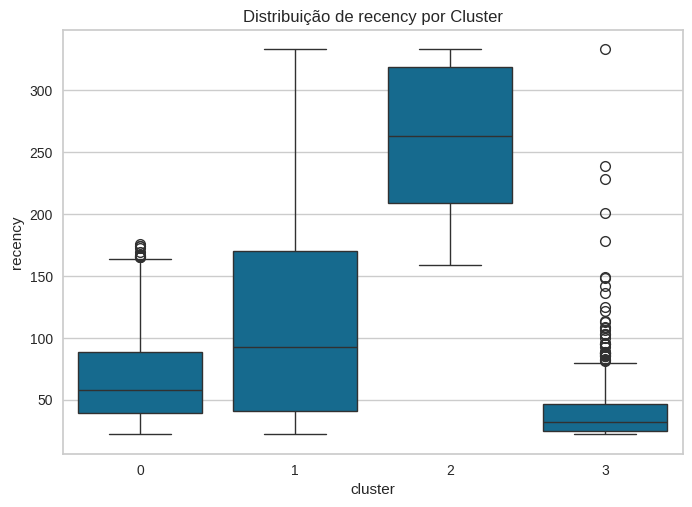

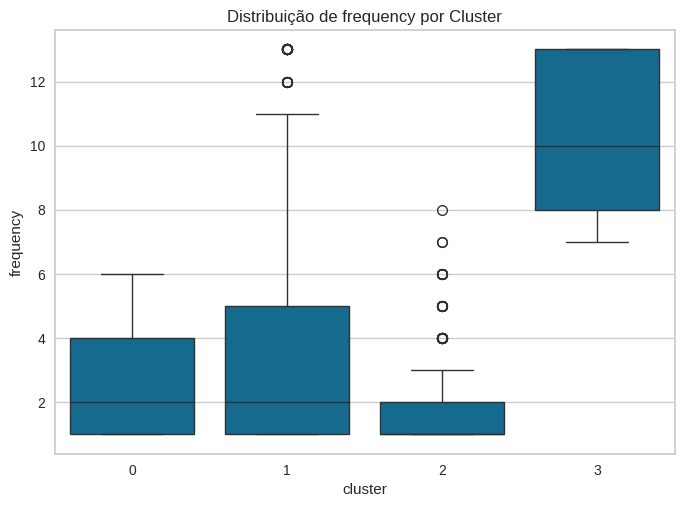

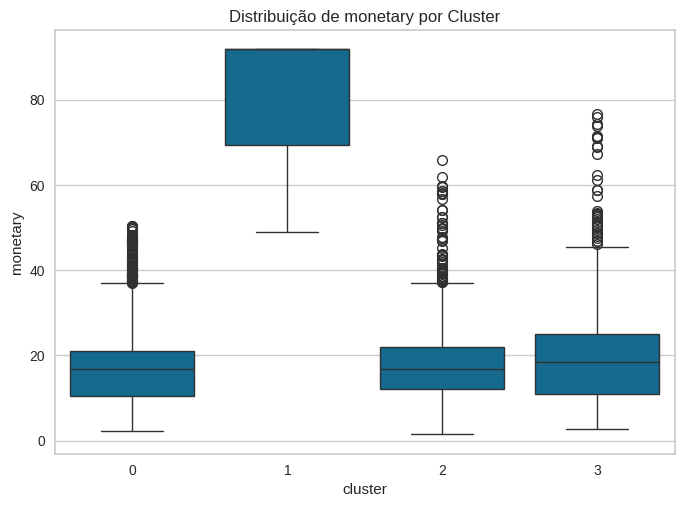

In [ ]:
for col in ["recency", "frequency", "monetary"]:
    sns.boxplot(x="cluster", y=col, data=df_rfm_clip.reset_index())
    plt.title(f"Distribuição de {col} por Cluster")
    plt.show()

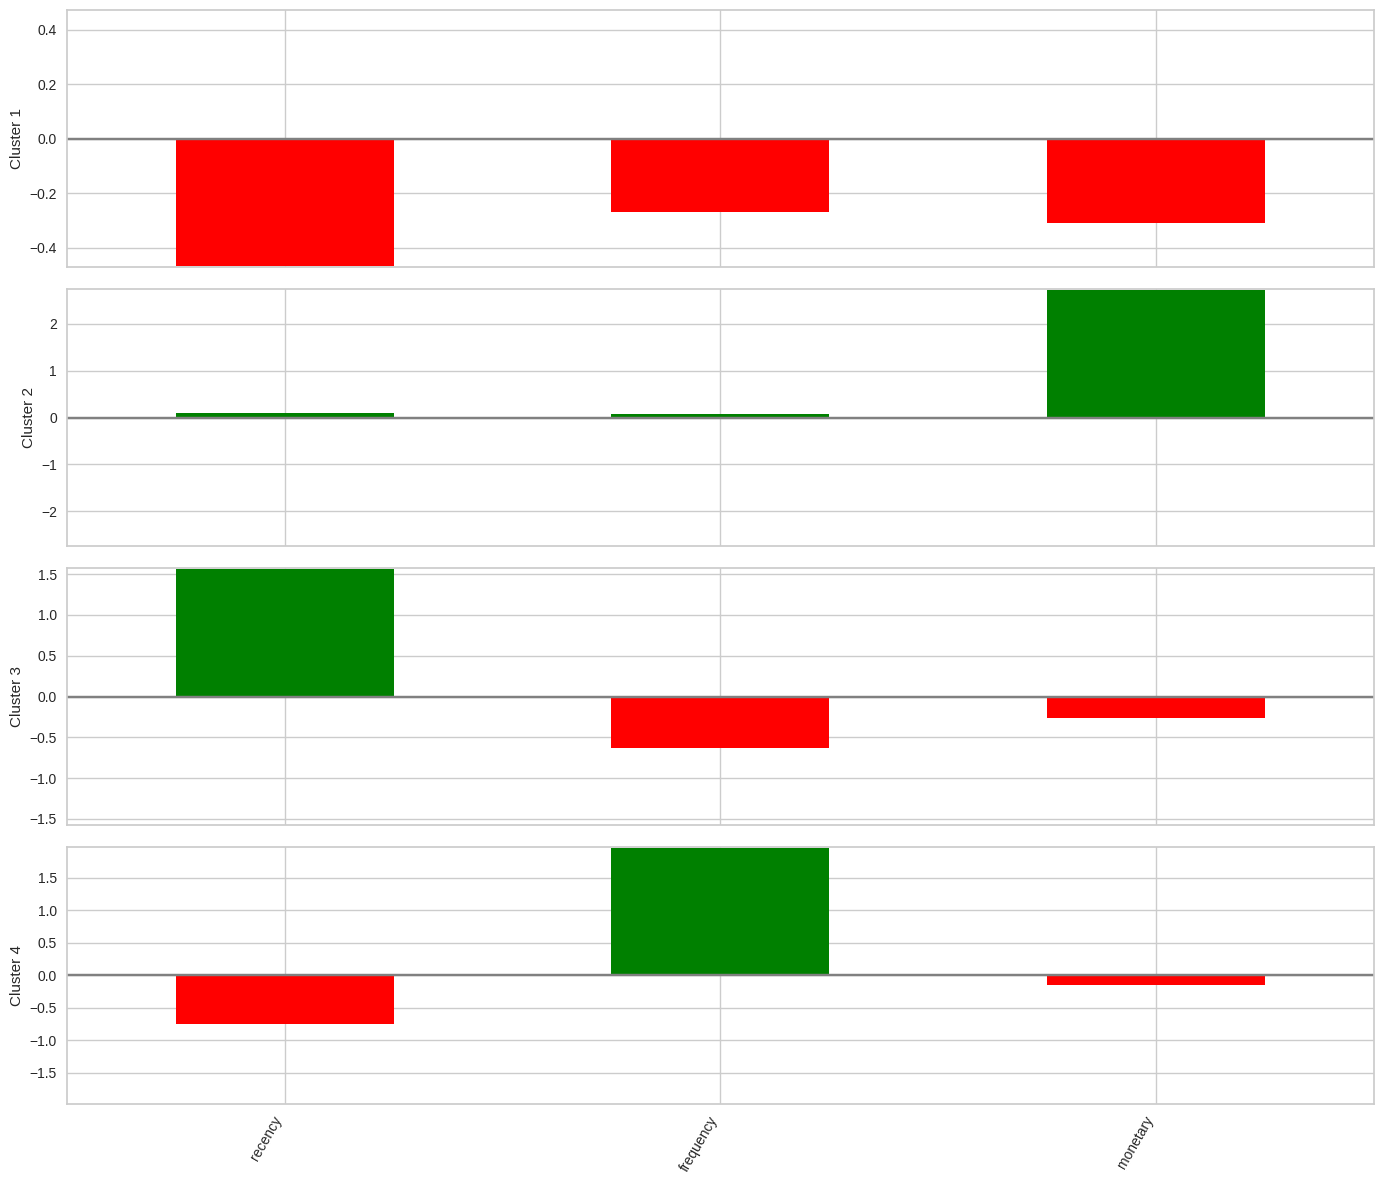

In [ ]:
#Visual representation of normalized cluster data

fig,axes = plt.subplots(nrows=4, figsize=(14,12), sharex=True)

for i,ax in enumerate(axes):
  center = centers.loc[i,:]
  maxPC = 1.01 * center.abs().max()
  colors = ['green' if l > 0 else 'red' for l in center]
  center.plot.bar(ax=ax, color=colors)
  ax.set_ylabel(f'Cluster {i+1}')
  ax.set_ylim(-maxPC, maxPC)
  ax.axhline(color='gray')
  ax.xaxis.set_ticks_position('none')

plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Visual representation of clusters based on RFM indicators

(
 df_rfm_clip.assign(cluster= kmeans_labels)
 .groupby('cluster')
 .mean()
 .transpose()
 .style.background_gradient(cmap='YlOrRd', axis=1)
)

cluster,0,1,2,3
recency,67.562181,121.057935,261.186858,41.517018
frequency,2.703152,3.876574,1.510267,10.191248
monetary,17.120454,80.714098,18.104829,20.426973


## Step 05) Interpret the results obtained

1. Describe the purchasing profile of customers in each cluster
2. Justify how this analysis can be useful for the company to segment its customers and personalize marketing campaigns
3. Suggest possible actions based on the analyses performed


5.1 Description of Customer Purchasing Profile by Cluster

**Cluster 1: Inactive Low-Value Customers**

Recency: 260 days (customers who haven’t purchased for a long time).

Frequency: 1.5 purchases on average (infrequent customers).

Monetary: $18.10 on average (very low average spend).

Profile: Sporadic customers, low retention, and little-added value.

**Cluster 2: Moderately Active Low-Value Customers**

Recency: 67 days (more recently engaged customers).

Frequency: 2.7 purchases on average (moderate frequency customers).

Monetary: $17.12 on average (low average spend).

Profile: Customers who make occasional purchases but still have low financial impact.

**Cluster 3: Active High-Value Customers**

Recency: 121 days (relatively active but not recent customers).

Frequency: 3.9 purchases on average (frequent customers).

Monetary: $80.71 on average (high average spend per customer).

Profile: Regular customers with high value for the company.

**Cluster 4: Recent and Very Frequent Customers**

Recency: 41 days (recent customers).

Frequency: 10.2 purchases on average (highly frequent customers).

Monetary: $20.43 on average (moderate average spend).

Profile: Engaged customers who buy frequently but with relatively low ticket sizes.

##5.2 Justifying how this analysis can be useful for the company to segment its customers and personalize marketing campaigns

**Segmentation**: The analysis allows targeted campaigns for each profile, optimizing resources and increasing effectiveness.

**Personalization**: Identifying needs and behavioral patterns helps create personalized offers and improve the customer experience.

**Retention**: Focus on higher-value clusters (2 and 3) to retain these customers and increase their lifecycle value.


## 5.3 Suggesting possible actions based on the analyses performed

**Cluster 1:** Inactive Low-Value Customers

Strategy: Reactivation campaigns, such as personalized discount emails or suggested products.

Incentive: Offer exclusive promotions for the next purchase.

**Cluster 2:** Moderately Active Low-Value Customers

Strategy: Increase spend with product packages or combos.

Incentive: Offer a basic loyalty program to encourage more frequent purchases.

**Cluster 3:** Active High-Value Customers

Strategy: Retain and increase engagement through VIP programs or exclusive offers.

Incentive: Create an exclusive communication channel for these customers with benefits like early access to launches.

**Cluster 4:** Recent and Very Frequent Customers

Strategy: Encourage higher-value purchases to increase average ticket size.

Incentive: Offer promotions based on purchase volume or recommend complementary products.
